In [4]:
from sqlalchemy import create_engine, func
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
import pandas as pd
import config

engine = create_engine(f"postgresql+psycopg2://{config.user}:{config.password}@{config.host}:{config.port}/{config.dbname}")
Base = automap_base()
Base.prepare(engine, schema='market', reflect=True)

youtube = Base.classes.youtube

session = Session(engine)

youtube_result = session.query(youtube)

yt_df = pd.read_sql(youtube_result.statement, con=engine.connect())


C:\Users\jonna\AppData\Local\Temp\ipykernel_4204\1232936734.py:9: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, schema='market', reflect=True)


In [5]:
yt_df

,id,title,url,viewcount,date,likes,duration,commentscount
0,#ThrowbackThursday KKCF Closing reflections - ...,XSv9L3X06no,https://www.youtube.com/watch?v=XSv9L3X06no,23,2023-01-12,1,0:51,0.0
1,TKH 2022 Recap!,MRK-udGUqHE,https://www.youtube.com/watch?v=MRK-udGUqHE,79,2022-12-31,4,1:43,1.0
2,I wanted to learn more about what's out there ...,6ROEezBabdk,https://www.youtube.com/watch?v=6ROEezBabdk,22,2022-12-23,1,1:43,0.0
3,I am part of this prestigious fellowship becau...,dmMYfGAHPsA,https://www.youtube.com/watch?v=dmMYfGAHPsA,28,2022-12-20,4,1:0,0.0
4,My life changed with an opportunity ÔÇª - Edwa...,dKELjCM5cnM,https://www.youtube.com/watch?v=dKELjCM5cnM,41,2022-12-13,8,2:2,0.0
...,...,...,...,...,...,...,...,...
65,From Tech User to Tech Creator! Join The Knowl...,pWzVLrwgXlI,https://www.youtube.com/watch?v=pWzVLrwgXlI,101,2022-05-31,1,1:3,0.0
66,UNPACKING: Hiring Bias in Technology - Gender ...,WtHVIJaeFjc,https://www.youtube.com/watch?v=WtHVIJaeFjc,10,2022-04-20,1,58:6,0.0
67,Our Story,il66kN0U8eg,https://www.youtube.com/watch?v=il66kN0U8eg,46,2021-09-11,2,1:0,0.0
68,Bridge to Tech: Digital Communications Pre-Tra...,8l2MjE2uWY4,https://www.youtube.com/watch?v=8l2MjE2uWY4,117,2019-03-26,2,7:39,0.0


<H2>Youtube Likes Analysis<H2>

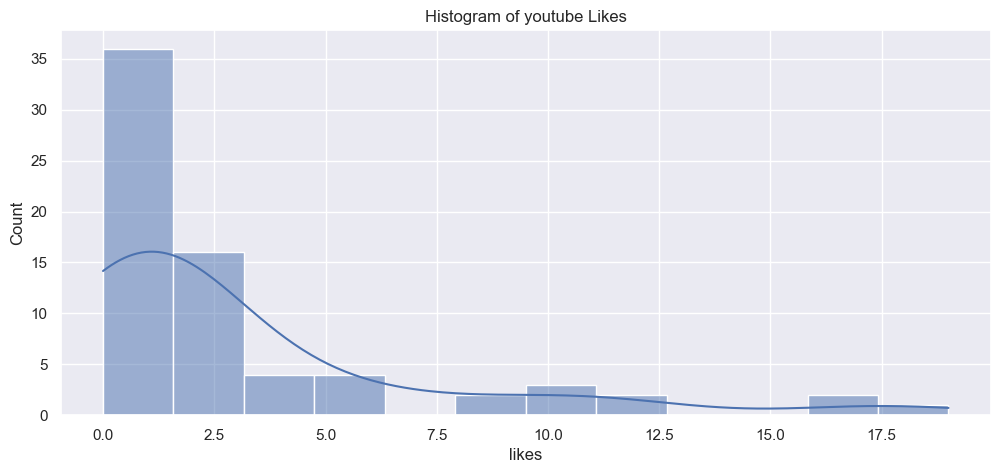

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
import numpy as np 

# histogram of likes 
sns.set(rc={'figure.figsize':(12,5)})
sns.histplot(data=yt_df, x ='likes', kde=True)
plt.title('Histogram of youtube Likes')
plt.show()

<AxesSubplot: ylabel='likes'>

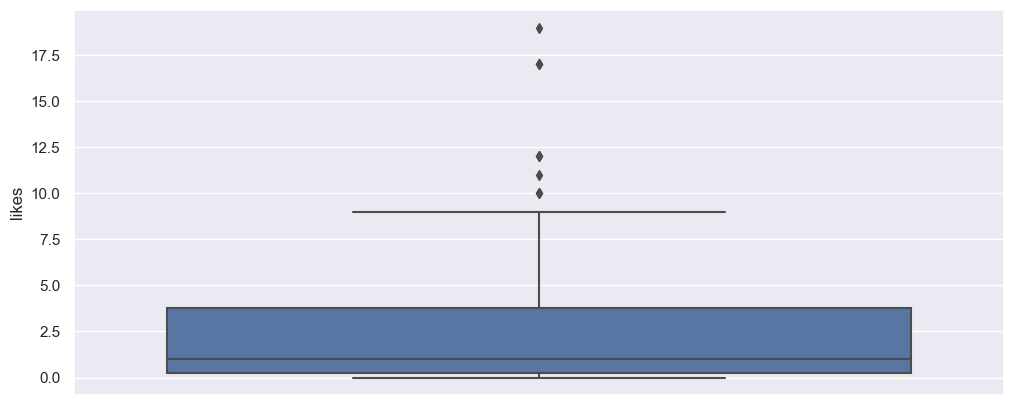

In [7]:
sns.boxplot(data=yt_df, y="likes", showfliers=True)

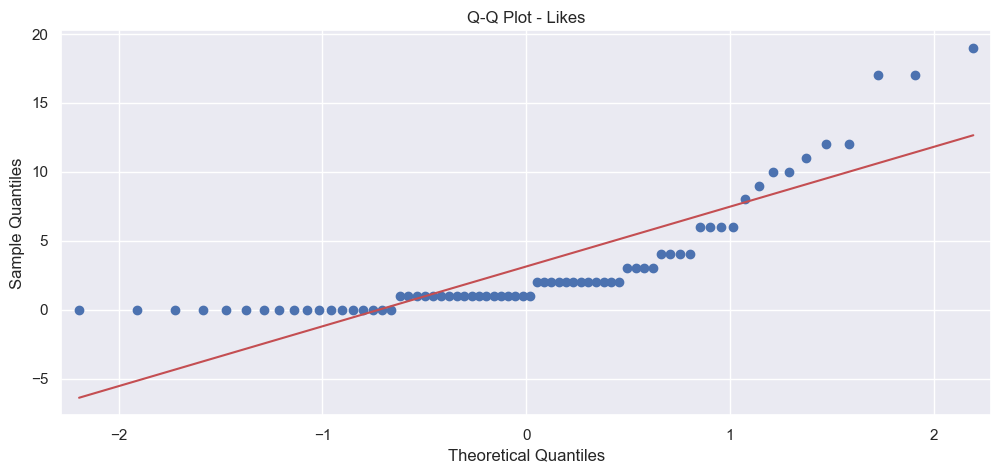

In [8]:
sorted_likes = yt_df['likes'].sort_values()

sm.qqplot(sorted_likes, line='s')
plt.title('Q-Q Plot - Likes')
plt.show()

In [9]:
# KS test - Likes
stats.kstest(yt_df["likes"], stats.norm.cdf, args=(yt_df["likes"].mean(), yt_df["likes"].std()))


KstestResult(statistic=0.28760304429799455, pvalue=1.2779163752111574e-05, statistic_location=2, statistic_sign=1)

<H2>Youtube Views Analysis<H2>

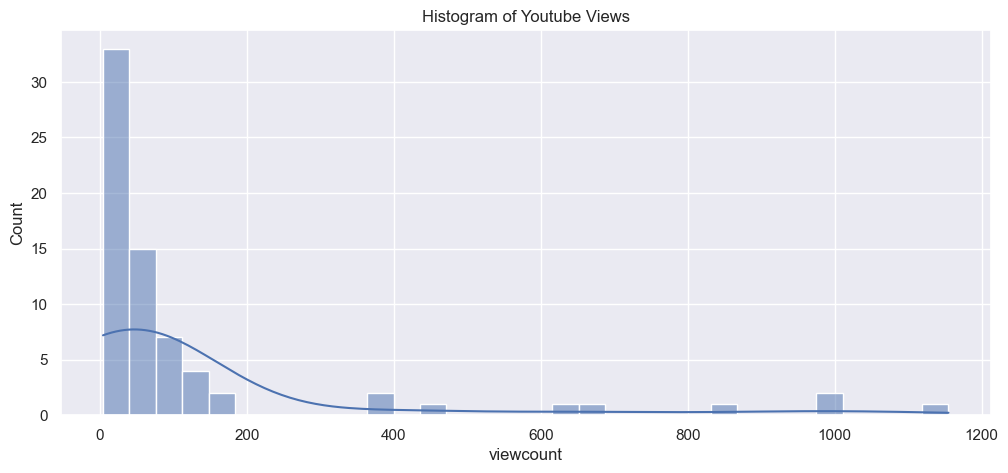

In [11]:
sns.histplot(data=yt_df, x ='viewcount', kde=True)
plt.title('Histogram of Youtube Views')
plt.show()

<AxesSubplot: ylabel='viewcount'>

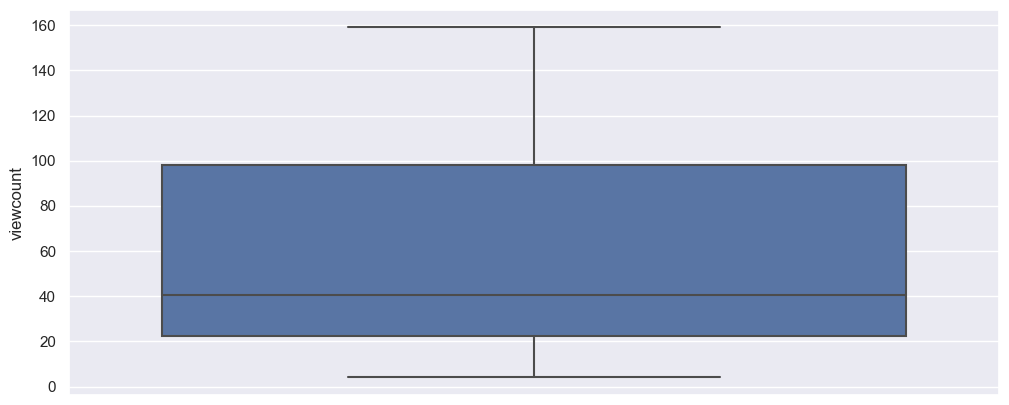

In [12]:
sns.boxplot(data=yt_df, y="viewcount", showfliers=False)

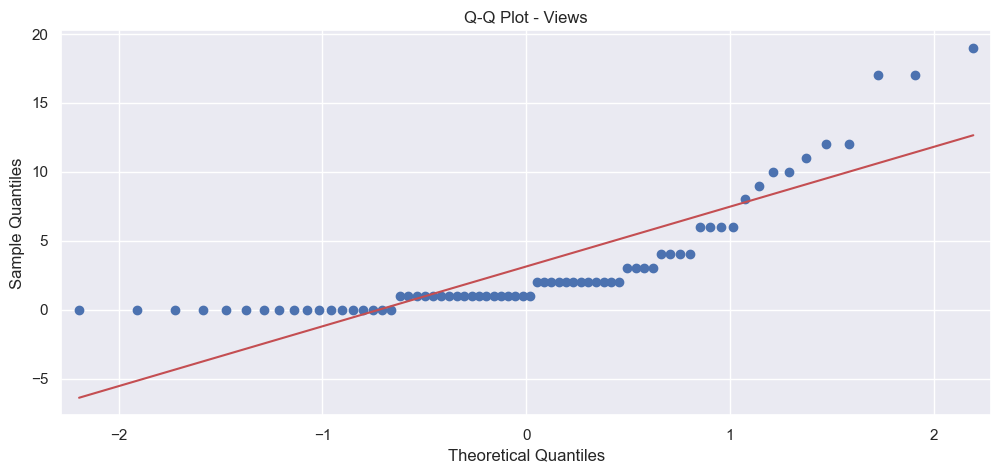

In [13]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

sorted_comments = yt_df['viewcount'].sort_values()

sm.qqplot(sorted_likes, line='s')
plt.title('Q-Q Plot - Views')
plt.show()

In [14]:
stats.kstest(yt_df["viewcount"], stats.norm.cdf, args=(yt_df["viewcount"].mean(), yt_df["viewcount"].std()))

KstestResult(statistic=0.3554266492168018, pvalue=2.0322679736156483e-08, statistic_location=128, statistic_sign=1)

<H2>Youtube Comments Analysis<H2>

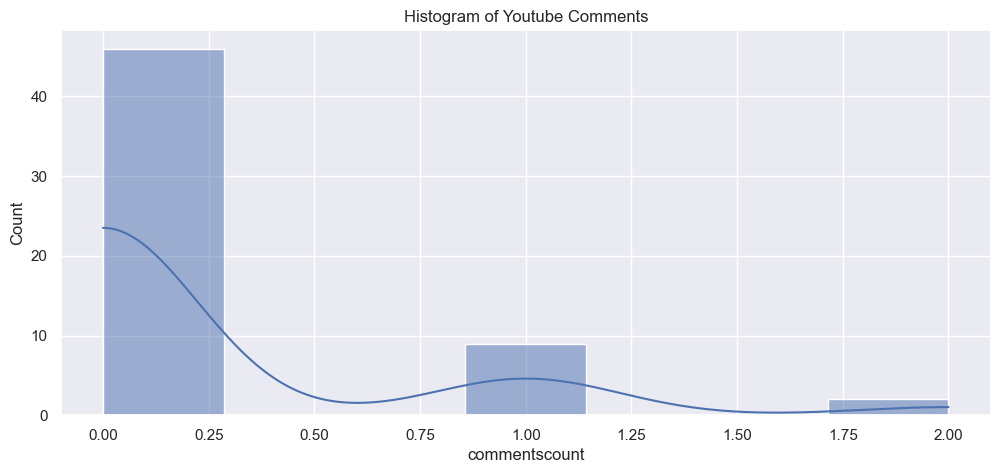

In [16]:
sns.histplot(data=yt_df, x ='commentscount', kde=True)
plt.title('Histogram of Youtube Comments')
plt.show()

<AxesSubplot: ylabel='commentscount'>

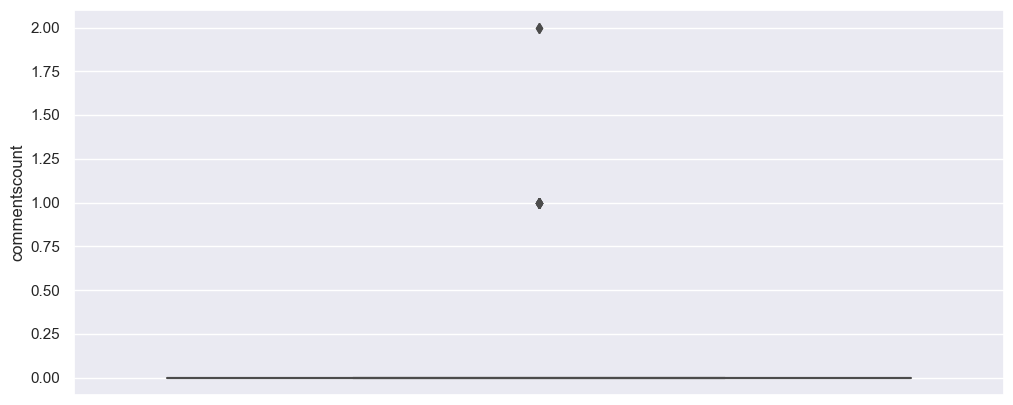

In [17]:
sns.boxplot(data=yt_df, y="commentscount", showfliers=True)

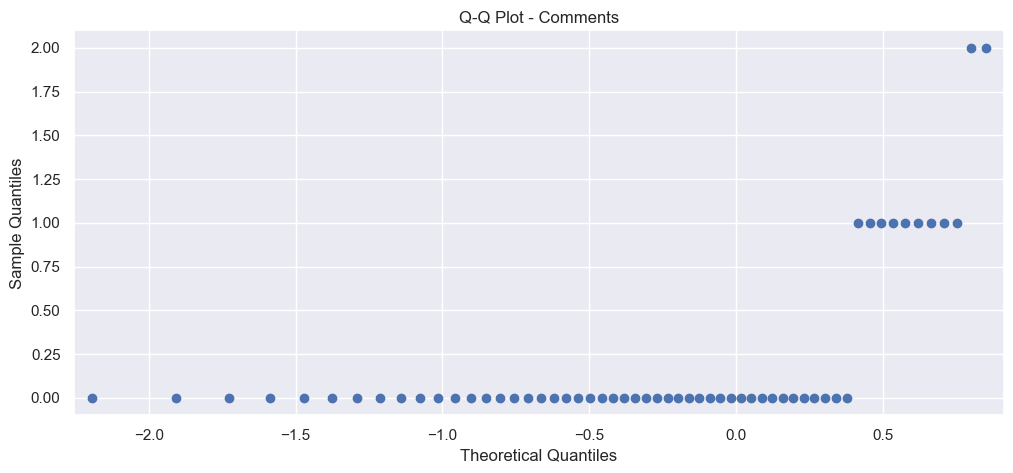

In [18]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

sorted_comments = yt_df['commentscount'].sort_values()

sm.qqplot(sorted_comments, line='s')
plt.title('Q-Q Plot - Comments')
plt.show()

In [19]:
stats.kstest(yt_df["commentscount"], stats.norm.cdf, args=(yt_df["commentscount"].mean(), yt_df["commentscount"].std()))

KstestResult(statistic=nan, pvalue=nan, statistic_location=nan, statistic_sign=-1)

<h1>Correlations<h1>

<h2>Likes vs Views<h2>

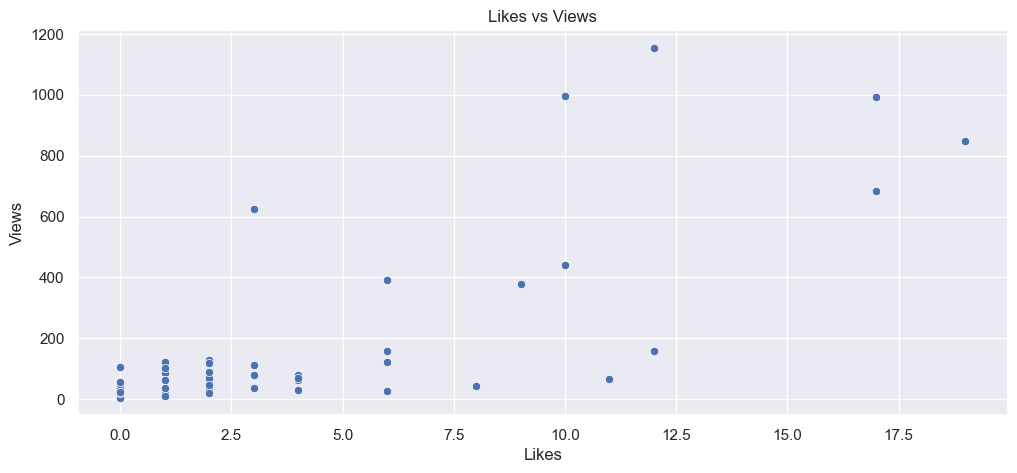

In [21]:
sns.scatterplot(data=yt_df, x='likes',y='viewcount')

plt.title('Likes vs Views')
plt.xlabel('Likes')
plt.ylabel('Views')

plt.show()

C:\Users\jonna\AppData\Local\Temp\ipykernel_4204\1860445028.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = yt_df.corr()


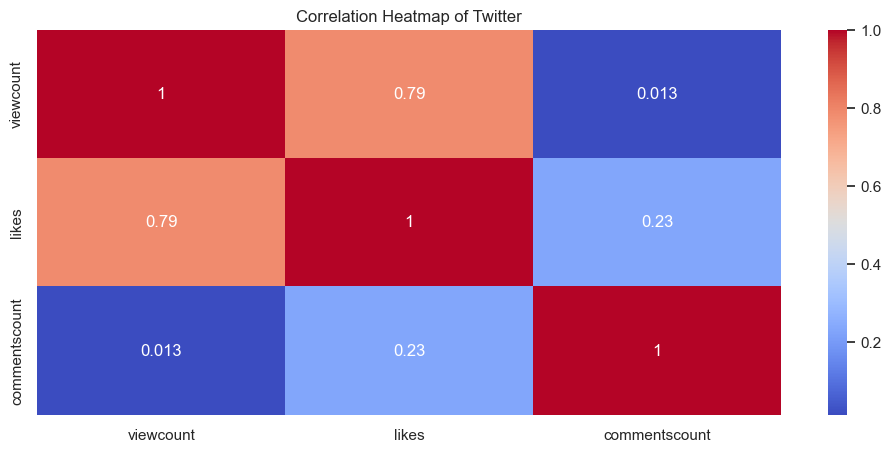

In [22]:
correlation_matrix = yt_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.title('Correlation Heatmap of Twitter')
plt.show()

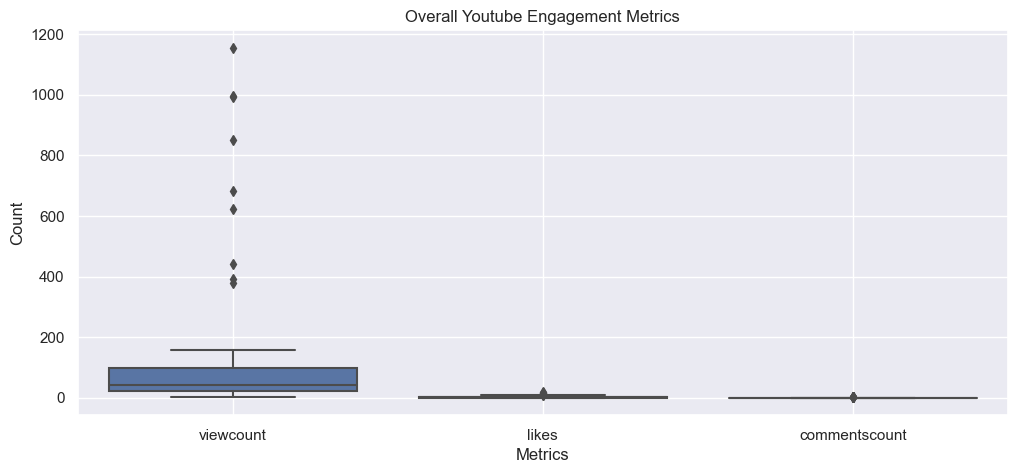

In [23]:
sns.boxplot(data=yt_df)

plt.xlabel('Metrics')
plt.ylabel('Count')
plt.title('Overall Youtube Engagement Metrics')
plt.grid(True)

plt.show()

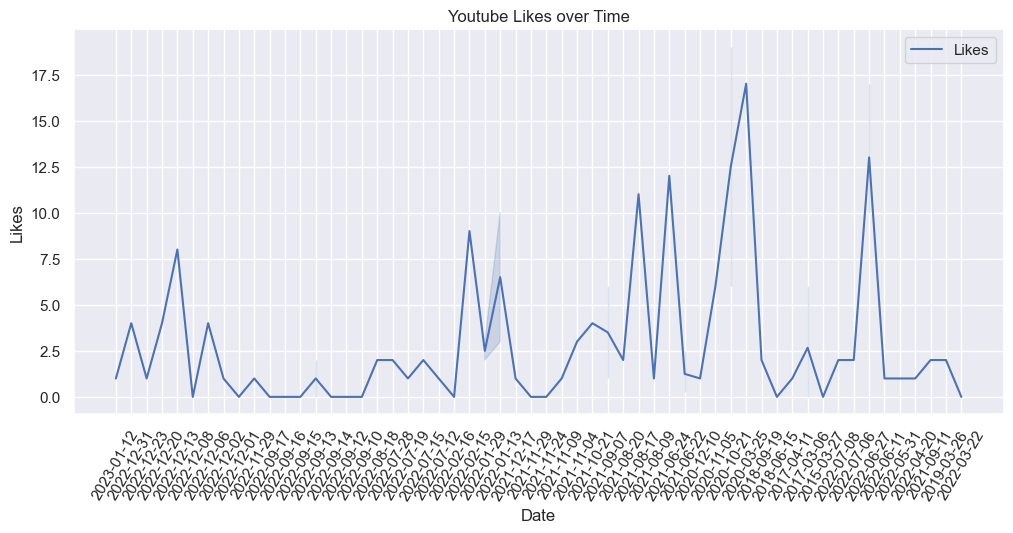

In [24]:
sns.lineplot(data=yt_df, x = yt_df['date'], y='likes', label='Likes')

plt.xlabel('Date')
plt.ylabel('Likes')
plt.xticks(rotation=60)
plt.title('Youtube Likes over Time')
plt.show()

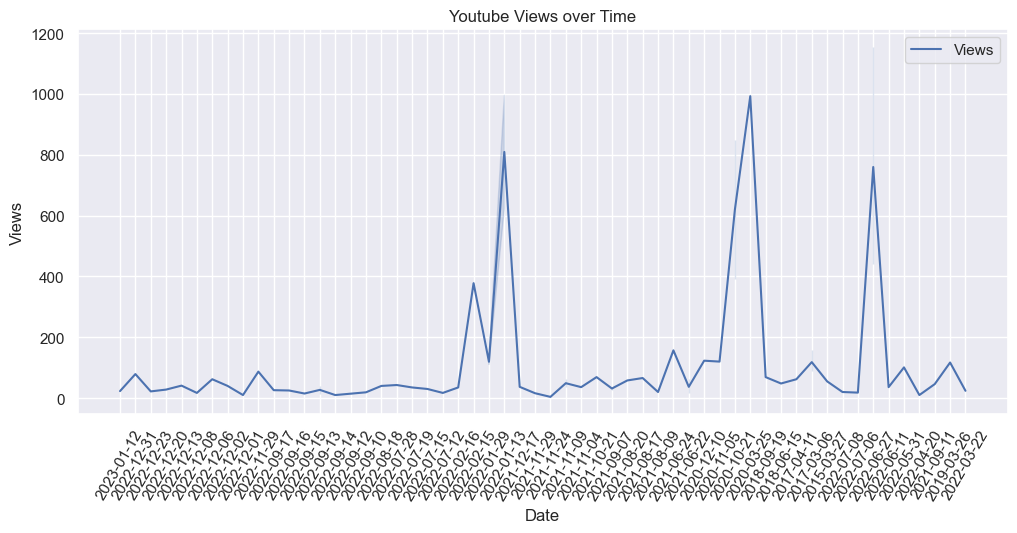

In [25]:
sns.lineplot(data=yt_df, x = yt_df['date'], y='viewcount', label='Views')

plt.xlabel('Date')
plt.ylabel('Views')
plt.xticks(rotation=60)
plt.title('Youtube Views over Time')
plt.show()

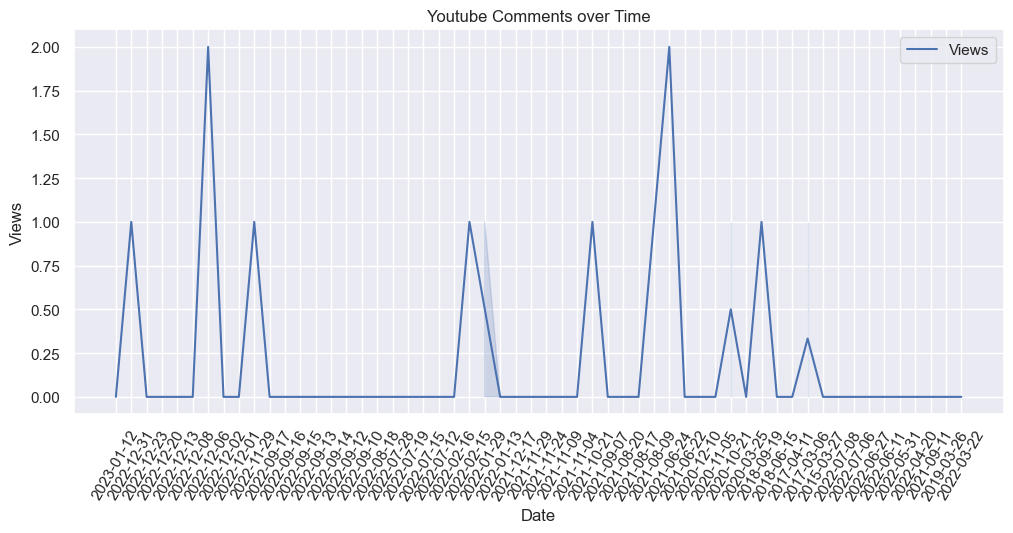

In [26]:
sns.lineplot(data=yt_df, x = yt_df['date'], y='commentscount', label='Views')

plt.xlabel('Date')
plt.ylabel('Views')
plt.xticks(rotation=60)
plt.title('Youtube Comments over Time')
plt.show()